### Boxplot

In [1]:
from dataclasses import dataclass
from itertools import chain

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
@dataclass
class Category:
    name: str
    values: list[float]

@dataclass        
class Boxplot:
    title: str
    categories: list[Category]
        
    def plot(self, figsize=(8, 5), label_size=14, title_size=20):
        plt.figure(figsize=figsize)
        sns.boxplot(
            y=[val for c in self.categories for val in [c.name] * len(c.values)],
            x=[val for c in self.categories for val in c.values],
            order=[c.name for c in self.categories],
            orient='h'
        )
        plt.tick_params(labelsize=label_size)
        plt.title(self.title, fontsize=title_size)
        plt.show()

In [3]:
boxplot = Boxplot(
    'Score', [
        Category(
            'Model-1',
            [    
                0.80,
                0.82,
                0.90,
                0.85,
                0.79,
                0.88
            ]
        ),

        Category(
            'Model-2',
            [    
                0.89,
                0.84,
                0.81,
                0.75,
                0.91,
                0.85,
            ]
        ),
    ]
)

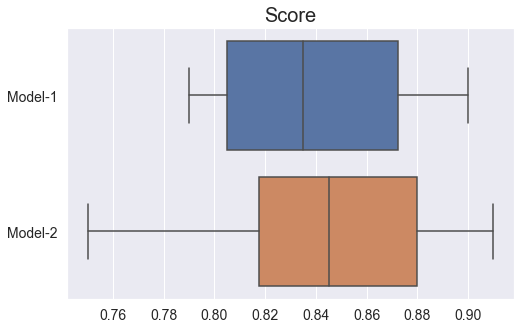

In [4]:
boxplot.plot()

### ...

In [5]:
import matplotlib.pyplot as plt

In [6]:
def plot_one_bar(names, scores, 
                 xlabel=None, ylabel=None, title=None,
                 figsize=(5, 5), rotation=0, ylim=None, order=None):
    scores = np.array(scores)
    names = np.array(names)
    if order == 'inc':    
        perm = np.argsort(scores)
    elif order == 'dec':
        perm = np.argsort(scores)[::-1]
    else:
        perm = np.array(range(len(names)))
        
    plt.figure(figsize=figsize)
    plt.bar(names[perm], scores[perm])
    
    plt.xticks(rotation=rotation) 
    if xlabel is not None:
        plt.xlabel(xlabel)
    
    if ylabel is not None:
        plt.ylabel(ylabel)
    
    if ylim is not None:
        plt.ylim((0.75, 0.9))
        
    if title is not None:
        plt.title(title)
    plt.show()

In [7]:
markers = ('.', 'v', 'x', 'p', 's')

def get_cmap(n, name='gist_rainbow'):
    return plt.cm.get_cmap(name, n)

def grouped_scatter_plot(scatter_x, scatter_y, group, title=None, figsize=(6, 6), ind2label=None):
    if ind2label is None:
        ind2label = list(map(str, sorted(set(group))))
    
    fig = plt.figure()
    ax = plt.subplot()
    fig.set_figheight(figsize[0])
    fig.set_figwidth(figsize[1])
    
    cmap = get_cmap(len(set(group)))

    for g in sorted(set(group)):
        ix = np.where(group == g)
        ax.scatter(scatter_x[ix],
                   scatter_y[ix],
                   c=[cmap(int(g))],
                   marker=markers[g % len(markers)],
                   label=ind2label[g])
    ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')
    
    if title is not None:
        ax.set_title(title)
        
    plt.show()